In [1]:
import matplotlib.pyplot as plt
import  numpy as np
%matplotlib inline

In [2]:
mean_01 = [0.5, 1.0]
mean_02 = [5.0, 6.0]

cov_01 = [[0.5, 0.1], [0.1, 0.5]]
cov_02 = [[1.0, 0.1], [0.1, 1.0]]

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

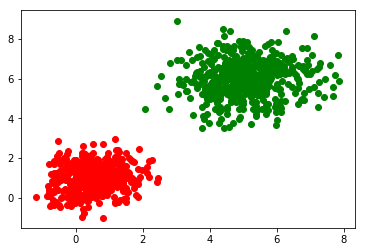

In [3]:
plt.scatter(dist_01[:, 0], dist_01[:, 1], color='red')
plt.scatter(dist_02[:, 0], dist_02[:, 1], color='green')
plt.show()

In [4]:
rows = dist_01.shape[0] + dist_02.shape[0]
cols = dist_01.shape[1] + 1

data = np.zeros((rows, cols))
data[:dist_01.shape[0],:2] = dist_01
data[dist_01.shape[0]:, :2] = dist_02
data[dist_01.shape[0]:, -1] = 1.0
print(data.shape)

(1000, 3)


In [5]:
np.random.shuffle(data)
test_data = data[:10]

In [6]:
def distance_euclid(p1, p2):
    ## Euclidian
    d = np.sqrt(((p1-p2)**2).sum())
    return d

In [7]:
def distance(p1, p2):
    #Manhattan Distance
    d = (abs(p1-p2)).sum()
    return d

distance(np.array([1.0,1.0]), np.array([3.0, 3.0]))

4.0

In [8]:
def KNN(X_train, Y_train, xtest, k=5):
    vals = []
    for ix in range(X_train.shape[0]):
        d = distance_euclid(X_train[ix], xtest)
        vals.append([d,Y_train[ix]])
    
    sorted_vals = sorted(vals, key=lambda mn:mn[0])
    neighbours = np.array(sorted_vals)[:k,-1]  #getting top k votes based on shortest distance
    freq = np.unique(neighbours, return_counts=True)
    
    my_ans = freq[0][freq[1].argmax()] #return the prediction of that class whose frequency is maximum
    return my_ans

In [9]:
### Dataset for input
X_train = test_data[:,:2]
Y_train = test_data[:, -1]
x_test = np.array([2.9, 2.9])
k = 3
ans = KNN(X_train, Y_train, x_test, 3)

In [10]:
print(ans)

0.0


In [11]:
## Test and Train Split
split = int(0.60*data.shape[0])

train_x = data[:split,:2]
train_y = data[:split, -1]

print(np.unique(train_y, return_counts=True))

test_x = data[split:, :2]
test_y = data[split:, -1]

print(train_x.shape)
print(train_y.shape)

(array([0., 1.]), array([291, 309], dtype=int64))
(600, 2)
(600,)


In [12]:
def get_acc(kx,x_train,x_test,y_train, y_test):
    preds = []
    for ix in range(x_test.shape[0]):
        label = KNN(x_train, y_train, x_test[ix], k=kx)
        preds.append(label)
    preds = np.array(preds)
    
    return 100*float((preds==y_test).sum())/y_test.shape[0] 

In [13]:
for kx in range(3, 9, 2):
    print(kx, " | ", get_acc(kx,train_x,test_x, train_y, test_y))

3  |  100.0
5  |  100.0
7  |  100.0


In [54]:
import pandas as pd

In [56]:
### Fashion dataset for MNIST
ds = pd.read_csv(r'C:\Users\Shashank\Desktop\Lecture_3/fashion-mnist_train.csv')
ds.tail(n=3)
fashion_data = ds.values[:3000]
print(fashion_data.shape)

(3000, 785)


In [58]:
## Splitting the dataset
fashion_split = int(fashion_data.shape[0]*0.8)
fashion_train_x = fashion_data[:split,1:]
fashion_train_y = fashion_data[:split,0]
fashion_test_x = fashion_data[split:, 1:]
fashion_test_y = fashion_data[split:, 0]

print(np.unique(fashion_test_y, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64), array([257, 257, 245, 219, 246, 223, 220, 259, 229, 245], dtype=int64))


In [59]:
get_acc(3,fashion_train_x, fashion_test_x, fashion_train_y, fashion_test_y)

74.625

In [60]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier

In [61]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(fashion_train_x, fashion_train_y)
100*neigh.score(fashion_test_x, fashion_test_y)

74.91666666666667

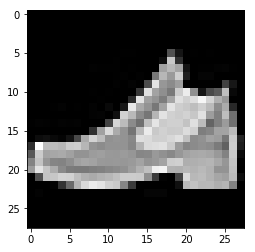

9


In [63]:
plt.imshow(fashion_train_x[1].reshape(28,28), cmap='gray')
plt.show()
print(fashion_train_y[1])